<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="center"; style="background-color:transparent;"><a href = "https://joliot.cea.fr/drf/joliot/recherche/neurospin"><img src="https://baobablab.github.io/bhb/images/collaborators/cea.jpg" width="35%"></td>
    <td align="center"; style="background-color:transparent; width: 50%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/brain_anatomy_schizophrenia/raw/main/DATAIA-h.png" width="80%"></a></td>
  </tr>
</table> 
</div>

<center><h1>Predict schizophrenia using brain anatomy</h1></center>


<center><i>Edouard Duchesnay, Antoine Grigis, Benoît Dufumier (Université Paris-Saclay, CEA, NeuroSpin), François Caud, Alexandre Gramfort (Université Paris-Saclay, DATAIA) </i></center>

Predict schizophrenia from brain grey matter (GM). schizophrenia is associated with diffuse and complex pattern of brain atrophy. We will try to learn a predictor of the clinical status (patient with schizophrenia vs. healthy control) using GM measurements on the brain participants.


## Dataset

There are 410 samples in the training set and 103 samples in the test set.


### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`age` column for regression problem.

## Evaluation metrics

[sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

The main Evaluation metrics is the Root-mean-square deviation
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation). We will also
look at the R-squared
[R2](https://en.wikipedia.org/wiki/Coefficient_of_determination).


## Links


- [RAMP-workflow’s documentation](https://paris-saclay-cds.github.io/ramp-workflow/)
- [RAMP-workflow’s github](https://github.com/paris-saclay-cds/ramp-workflow)
- [RAMP Kits](https://github.com/ramp-kits)

## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

Therefore, we advise you to install [Anaconda
distribution](https://www.anaconda.com/download/) which include almost all
dependencies.

Only `nilearn` and `ramp-workflow` are not included by default in the Anaconda
distribution. They will be installed from the execution of the notebook.

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

If you are using conda, we provide an environment.yml file for similar usage.

```
conda env create -f environment.yml
```

Then, you can activate the environment using:

```
conda activate brain-anatomy-schizophrenia
```

And desactivate using

```
conda deactivate
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Execute the jupyter notebook, from the root directory using:

```
jupyter notebook brain_anatomy_schizophrenia_starting_kit.ipynb
```

Tune your model using the starting_kit

3. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

4. Submission on RAMP:

[Using RAMP starting-kits](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Descriptive statistics

e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


         age                                                    
       count       mean        std   min   25%   50%   75%   max
set                                                             
test   103.0  33.466019  12.809935  14.0  23.5  31.0  41.0  66.0
train  410.0  33.068293  12.562225  15.0  22.0  29.0  43.0  65.0
           age
set   sex     
test  0.0   65
      1.0   38
train 0.0  257
      1.0  153


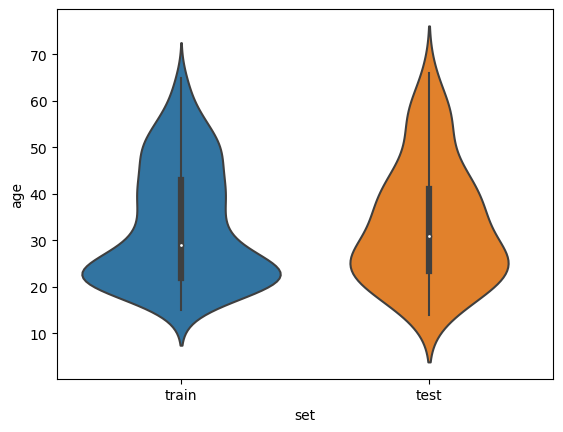

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

sns.violinplot(x="set", y="age", data=participants)
print(participants[["age", "set"]].groupby("set").describe())
print(participants[["set", "sex", "age"]].groupby(["set", "sex"]).count())

## Unsupervized analysis: Explore main sources of variabilities

Load ROIs data, `train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [2]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois = pd.concat([rois_train, rois_test])

### PCA on ROIs: explore global effect of age

e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\envs\comp0186\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

                 sum_sq     df          F        PR(>F)
diagnosis   2606.207928    1.0  29.245287  9.808873e-08
Residual   45538.013350  511.0        NaN           NaN
                 sum_sq     df          F    PR(>F)
diagnosis    791.094363    1.0  10.876419  0.001042
Residual   37167.493121  511.0        NaN       NaN


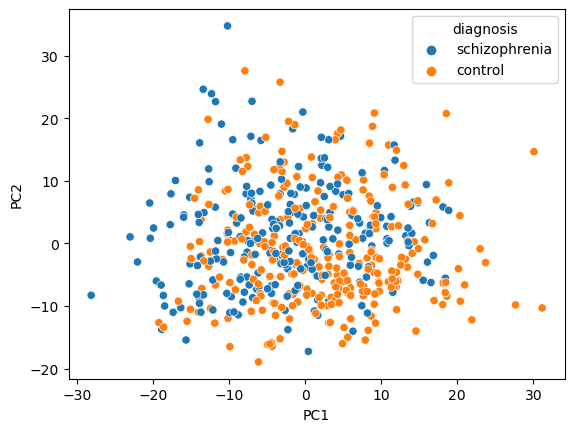

In [3]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

PCs = PCA(n_components=2).fit_transform(rois)
participants['PC1'], participants['PC2']  = PCs[:, 0], PCs[:, 1]

sns.scatterplot (x="PC1", y="PC2", hue="diagnosis",  data=participants)
oneway = smf.ols('PC1 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))
oneway = smf.ols('PC2 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))

Diagnosis is associated with two first components, we expect to be abble to predict the diagnosis

## Machine learning


Import and read data

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

Load concatenated data: 284 features from ROIs and 331,695 features from VBM.

In [5]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

assert X_train.shape[1] == 284 + 331695

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [6]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

fe = VBMFeatureExtractor()
print(fe.transform(X_train).shape)

(410, 284)
(410, 331695)


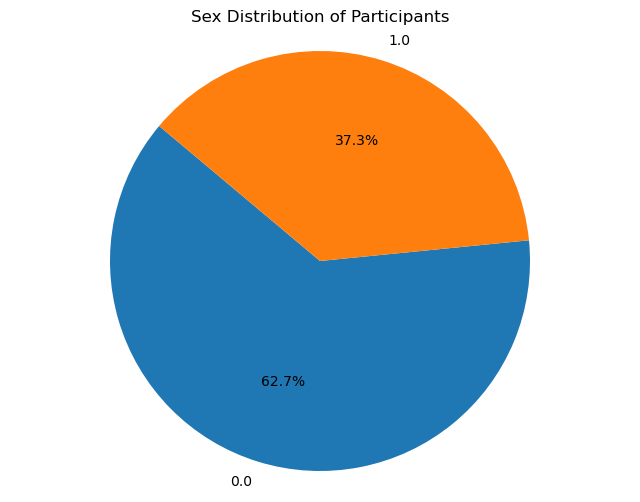

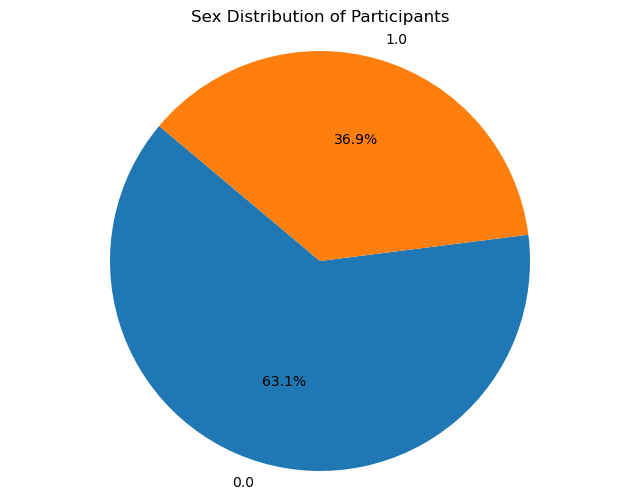

In [22]:
import matplotlib.pyplot as plt

sex_distribution = participants_train['sex'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution of Participants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

sex_distribution = participants_test['sex'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution of Participants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


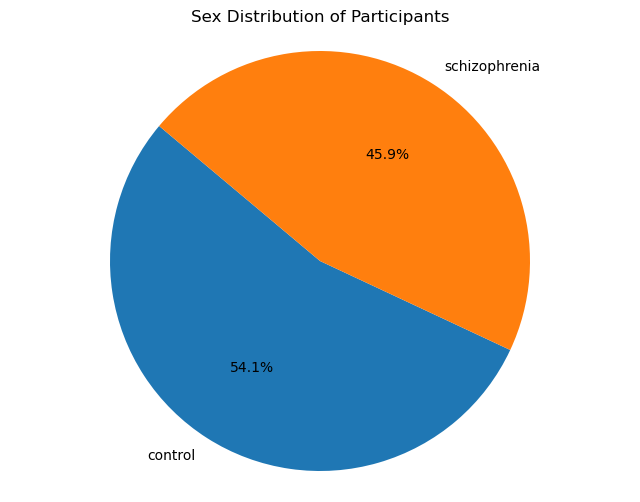

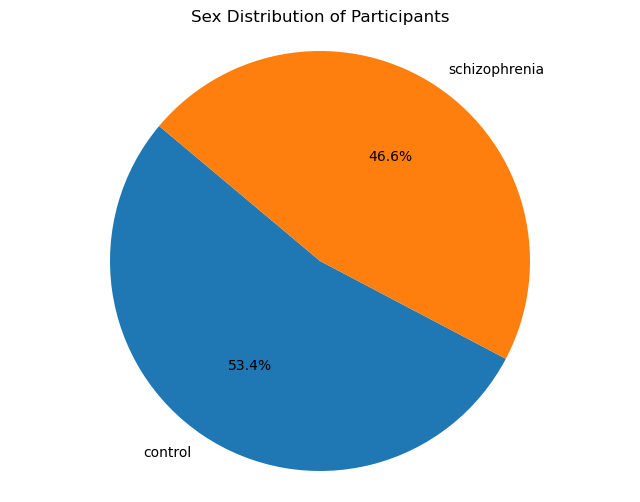

In [23]:

sex_distribution = participants_train['diagnosis'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution of Participants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


sex_distribution = participants_test['diagnosis'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution of Participants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Design of predictors and their evaluation using CV and test set

L1 Logistic Regression

In [7]:
# LogisticRegression | common cross validation | RIO features only

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1))

    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   14.2s finished
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


# 5CV
bACC=0.71 ROC-AUC=0.79
# Test
bACC=0.77 ROC-AUC=0.85


In [8]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=2, shuffle=True, random_state=1)


estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', random_state=1, solver='liblinear'))

# Setup the hyperparameter distributions to sample from
param_distributions = {
    'logisticregression__C': loguniform(1e-3, 10)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'logisticregression__C': 0.12785717080546086}
# 5CV
bACC=0.71 ROC-AUC=0.79
# Test
bACC=0.74 ROC-AUC=0.84


In [27]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1, C = 0.12785717080546086))

    

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))


Training and testing time: 0.0985 seconds


In [9]:
# LogisticRegression | StratifiedGroupKFold cross validation | RIO features only

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

groups = participants_train['sex']


estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1))


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

cv_results = cross_validate(estimator, X_train, y_train, groups=groups,
                            scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   10.7s finished


# 5CV
bACC=0.71 ROC-AUC=0.78
# Test
bACC=0.77 ROC-AUC=0.85


In [10]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler  # Ensure this is imported if not already
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np


groups = participants_train['sex']

# Setup the group stratified cross-validation
cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty='l1', random_state=1, solver='liblinear'))

param_distributions = {
    'logisticregression__C': loguniform(1e-3, 10)
}

random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)

# Pass the groups to the fit method
random_search.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search.best_params_)

print("# CV Results")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'logisticregression__C': 0.5992397731141761}
# CV Results
bACC=0.63 ROC-AUC=0.67
# Test
bACC=0.79 ROC-AUC=0.86


In [28]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1, C = 0.5992397731141761))

    

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))

Training and testing time: 0.0470 seconds


In [36]:
# LogisticRegression | common cross validation | VBM features only

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1))

    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   54.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   54.2s finished


# 5CV
bACC=0.69 ROC-AUC=0.79
# Test
bACC=0.70 ROC-AUC=0.82


In [37]:
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from scipy.stats import loguniform
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn import metrics
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# cv = KFold(n_splits=2, shuffle=True, random_state=1)


# estimator = make_pipeline(
#     VBMFeatureExtractor(),
#     StandardScaler(),
#     LogisticRegression(penalty = 'l1', random_state=1, solver='liblinear'))

# # Setup the hyperparameter distributions to sample from
# param_distributions = {
#     'logisticregression__C': loguniform(1e-3, 10)
# }

# # Setup RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator,
#                                    param_distributions=param_distributions,
#                                    n_iter=100,
#                                    scoring=['roc_auc', 'balanced_accuracy'],
#                                    refit='balanced_accuracy',
#                                    cv=cv,
#                                    verbose=1,
#                                    n_jobs=5,
#                                    random_state=1,
#                                    return_train_score=True)

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# print("Best parameters:", random_search.best_params_)

# # Reporting cross-validation results
# print("# 5CV")
# print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
#       'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# # Using the best estimator found to predict on test data
# y_pred_test = random_search.predict(X_test)
# score_pred_test = random_search.predict_proba(X_test)[:, 1]

# # Calculate test scores
# bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
# auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# # Print test results
# print("# Test")
# print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


Random Forest

In [11]:
# Random forest | common cross validation | RIO features only

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics

cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   12.2s finished


# 5CV
bACC=0.70 ROC-AUC=0.78
# Test
bACC=0.72 ROC-AUC=0.80


In [12]:
# Hyperparameter Tuning | Random forest | common cross validation | RIO features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 300),
    'randomforestclassifier__max_depth': randint(3, 10),
    'randomforestclassifier__min_samples_split': randint(2, 6),
    'randomforestclassifier__min_samples_leaf': randint(1, 6), 
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 275}
# 5CV
bACC=0.68 ROC-AUC=0.78
# Test
bACC=0.74 ROC-AUC=0.80


In [29]:
import time

start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=6, max_features='sqrt', min_samples_leaf=4, min_samples_split = 3, n_estimators = 275))

    

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))


Training and testing time: 2.0580 seconds


In [13]:
# Random forest | GroupStratifiedKFold cross validation | RIO features only

from sklearn.ensemble import RandomForestClassifier

groups = participants_train['sex'].values

# Assuming VBMFeatureExtractor is defined elsewhere
estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))


# Modify the number of splits as needed
cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

cv_results = cross_validate(estimator, X_train, y_train, groups=groups,
                            scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   10.7s finished


# 5CV
bACC=0.70 ROC-AUC=0.77
# Test
bACC=0.72 ROC-AUC=0.80


In [14]:
# Hyperparameter Tuning | Random forest | common cross validation | RIO features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 300),
    'randomforestclassifier__max_depth': randint(3, 10),
    'randomforestclassifier__min_samples_split': randint(2, 6),
    'randomforestclassifier__min_samples_leaf': randint(1, 6), 
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)

# Pass the groups to the fit method
random_search.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 103}
# 5CV
bACC=0.68 ROC-AUC=0.77
# Test
bACC=0.71 ROC-AUC=0.78


In [30]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=6, max_features='sqrt', min_samples_leaf=2, min_samples_split = 3, n_estimators = 103))

    

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))

Training and testing time: 0.7300 seconds


In [15]:
# Random forest | common cross validation | VBM features only

cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   25.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   25.2s finished


# 5CV
bACC=0.64 ROC-AUC=0.73
# Test
bACC=0.64 ROC-AUC=0.69


In [16]:
# Hyperparameter Tuning | Random forest | common cross validation | VBM features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 300),
    'randomforestclassifier__max_depth': randint(3, 10),
    'randomforestclassifier__min_samples_split': randint(2, 6),
    'randomforestclassifier__min_samples_leaf': randint(1, 6),
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 213}
# 5CV
bACC=0.64 ROC-AUC=0.73
# Test
bACC=0.60 ROC-AUC=0.69


In [31]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=3, max_features='sqrt', min_samples_leaf=4, min_samples_split = 2, n_estimators = 213))

    
# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()


# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))


Training and testing time: 24.1831 seconds


In [7]:
# Hyperparameter Tuning | Random forest | common cross validation | VBM features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 300),
    'randomforestclassifier__max_depth': randint(3, 15),
    'randomforestclassifier__min_samples_split': randint(2, 9),
    'randomforestclassifier__min_samples_leaf': randint(1, 9),
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.3, 0.5],
    'randomforestclassifier__bootstrap': [True, False],
}


# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5, 
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [17]:
# Random forest | GroupStratifiedKFold cross validation | VBM features only

groups = participants_train['sex'].values


estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))


# Modify the number of splits as needed
cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

cv_results = cross_validate(estimator, X_train, y_train, groups=groups,
                            scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   37.3s finished


# 5CV
bACC=0.63 ROC-AUC=0.74
# Test
bACC=0.64 ROC-AUC=0.69


In [11]:
# Hyperparameter Tuning | Random forest | common cross validation | VBM features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1))

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 300), 
    'randomforestclassifier__max_depth': randint(3, 10),
    'randomforestclassifier__min_samples_split': randint(2, 6),
    'randomforestclassifier__min_samples_leaf': randint(1, 6),
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100, 
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__n_estimators': 243}
# 5CV
bACC=0.62 ROC-AUC=0.76
# Test
bACC=0.60 ROC-AUC=0.69


In [32]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=3, max_features='sqrt', min_samples_leaf=5, min_samples_split = 4, n_estimators = 243))

    
# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))

Training and testing time: 26.7055 seconds


SVC

In [9]:
# SVC | common cross validation | RIO features only

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1)) 
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = balanced_accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:   11.9s finished


# 5CV
bACC=0.70 ROC-AUC=0.80
# Test
bACC=0.75 ROC-AUC=0.84


In [10]:
# SVC | GroupStratifiedKFold cross validation | ROI features only
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedGroupKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

groups = participants_train['sex'].values


estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

cv_results = cross_validate(estimator, X_train, y_train, groups=groups,
                            scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:    9.8s finished


# 5CV
bACC=0.72 ROC-AUC=0.79
# Test
bACC=0.75 ROC-AUC=0.84


In [21]:
# Hyperparameter Tuning | SVC | common cross validation | RIO features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from scipy.stats import expon, randint, uniform


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1)) 


param_distributions = {
    'svc__C': expon(scale=100),
    'svc__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(size=10)),
    'svc__degree': randint(2, 5)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy', 
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'svc__C': 1.8823342112877368, 'svc__degree': 3, 'svc__gamma': 'auto'}
# 5CV
bACC=0.53 ROC-AUC=0.57
# Test
bACC=0.74 ROC-AUC=0.85


In [33]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(C = 1.8823342112877368, degree = 3, gamma= 'auto', probability=True, random_state=1))

    
# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()

# Calculate and print training and testing time rounded to 4 digits
train_test_time = end_train_test - start_train_test
print("Training and testing time:", "{:.4f} seconds".format(train_test_time))

Training and testing time: 0.1829 seconds


In [12]:
# SVC | StratifiedGroupKFold cross validation | RIO features only

from scipy.stats import expon, randint, uniform
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)


estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'svc__C': expon(scale=100),
    'svc__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(size=10)), 
    'svc__degree': randint(2, 5)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = balanced_accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'svc__C': 1.8823342112877368, 'svc__degree': 3, 'svc__gamma': 'auto'}
# 5CV
bACC=0.55 ROC-AUC=0.58
# Test
bACC=0.74 ROC-AUC=0.85


In [33]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    SVC(C = 1.8823342112877368, degree = 3, gamma= 'auto', probability=True, random_state=1))

    
# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()
print("Training and testing time:", end_train_test - start_train_test, "seconds")

Training and testing time: 0.13194060325622559 seconds


In [10]:
# SVC | common cross validation | VBM features only

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = balanced_accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,  # Fixed the format specifier here
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed: 11.2min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed: 11.2min finished


# 5CV
bACC=0.64 ROC-AUC=0.74
# Test
bACC=0.66 ROC-AUC=0.72


In [11]:
# SVC | GroupStratifiedKFold cross validation | VBM features only
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedGroupKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

groups = participants_train['sex'].values


estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)

cv_results = cross_validate(estimator, X_train, y_train, groups=groups,
                            scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                            verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed: 11.4min finished
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed: 11.4min remaining:    0.0s


# 5CV
bACC=0.62 ROC-AUC=0.76
# Test
bACC=0.66 ROC-AUC=0.72


In [34]:
import time
start_train_test = time.time()

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))

    
# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

end_train_test = time.time()
print("Training and testing time:", end_train_test - start_train_test, "seconds")

Training and testing time: 749.4139201641083 seconds


In [ ]:
# Hyperparameter Tuning | SVM | common cross validation | VBM features only

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from scipy.stats import expon, randint, uniform


cv = KFold(n_splits=2, shuffle=True, random_state=1)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'svc__C': expon(scale=100),
    'svc__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(size=10)),
    'svc__degree': randint(2, 5)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5,
                                   random_state=1,
                                   return_train_score=True)



random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


In [ ]:
# Hyperparameter Tuning | SVC | StratifiedGroupKFold cross validation | VBM features only

from scipy.stats import expon, randint, uniform
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV


cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=1)


estimator = make_pipeline(
    VBMFeatureExtractor(),
    StandardScaler(),
    SVC(probability=True, random_state=1))  # Set probability=True for ROC AUC scoring

# Setup the hyperparameter distributions to sample from for RandomForestClassifier
param_distributions = {
    'svc__C': expon(scale=100),
    'svc__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(size=10)),
    'svc__degree': randint(2, 5)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   scoring=['roc_auc', 'balanced_accuracy'],
                                   refit='balanced_accuracy',  
                                   cv=cv,
                                   verbose=1,
                                   n_jobs=5, 
                                   random_state=1,
                                   return_train_score=True)


# Fit RandomizedSearchCV
random_search.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search.best_params_)

# Reporting cross-validation results
print("# 5CV")
print('bACC=%.2f' % np.mean(random_search.cv_results_['mean_test_balanced_accuracy']),
      'ROC-AUC=%.2f' % np.mean(random_search.cv_results_['mean_test_roc_auc']))

# Using the best estimator found to predict on test data
y_pred_test = random_search.predict(X_test)
score_pred_test = random_search.predict_proba(X_test)[:, 1]

# Calculate test scores
bacc_test = balanced_accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, score_pred_test)

# Print test results
print("# Test")
print('bACC=%.2f' % bacc_test, 'ROC-AUC=%.2f' % auc_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [ ]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
    ROIsFeatureExtractor(),
    StandardScaler(),
    LogisticRegression(penalty = 'l1', solver='liblinear', random_state=1, max_iter = 2000, C = 0.1))

    return estimator

Run locally:
    
```
ramp-test --submission starting_kit
```

## Submission on RAMP:


Follow the instructions: [Submitting to a ramp event](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html#submitting-to-a-ramp-event)

The event is [Predict schizophrenia from brain grey matter (classification)](https://ramp.studio/problems/brain_anatomy_schizophrenia)